In [1]:
import numpy as np
import pandas as pd
from paths import DATA_DIR

df = pd.read_csv(DATA_DIR / 'final_final.csv')

In [2]:
df.head()

,Unnamed: 0,title,text,label,text_word_count,text_stopword_count,text_punct_count,wierd_symbols_count,text_ent_count,text_hastag_count,...,title_punct_count,text_polarity,text_subjectivity,title_polarity,title_subjectivity,text_lexical_richness,title_lexical_richness,people_ents,org_ents,processed_text2
0,0,"U.N. rights boss sees possible ""crimes against...",GENEVA (Reuters) - The United Nations human ri...,1,460,199,59,1,42,0,...,2,0.006627,0.402625,0.0,1.0,0.732342,1.0,"['Nicolas Maduro', 'Zeid Ra', 'al Hussein', 'Z...","['Reuters', 'United Nations', 'the U.N. Human ...",geneva reuters united nations human rights c...
1,1,Germany: A lot of Brexit work remains even if ...,BERLIN (Reuters) - Germany regards Friday s jo...,1,138,62,9,1,18,0,...,1,-0.010714,0.125137,0.0,0.0,0.821429,1.0,"['Brexit', 'Brexit', 'Steffen Seibert']","['BERLIN', 'Reuters', 'the European Union', 't...",berlin reuters germany regards friday s join...
2,2,MSNBC ANCHOR Flabbergasted at What Texas Teach...,If we protect every other government building ...,0,220,110,17,1,11,0,...,2,-0.113194,0.370833,0.0,0.0,0.680328,0.0,"['Paul Cairney', 'Argyle']","['Texas Sheriff', 'MSNBC', 'MSNBC', 'the Texas...",protect government building public venue armed...
3,3,Kidnapped Red Cross staff released in Afghanis...,KABUL (Reuters) - Two Red Cross staff members ...,1,164,83,19,1,25,0,...,0,0.069792,0.160417,0.0,0.0,0.818182,0.0,['Monica Zanarelli'],"['KABUL', 'Reuters', 'Red Cross', 'the Interna...",kabul reuters red cross staff members kidnap...
4,4,Two hurt after report of explosion near Glasgo...,LONDON (Reuters) - Two people were injured on ...,1,102,42,15,1,14,0,...,1,-0.080000,0.260000,0.1,0.4,0.733333,0.0,['Wishaw'],"['Reuters', 'Wishaw', 'Fire and Rescue Service']",london reuters people injured thursday polic...


In [3]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label', 'text_word_count',
       'text_stopword_count', 'text_punct_count', 'wierd_symbols_count',
       'text_ent_count', 'text_hastag_count', 'text_mention_count',
       'text_url_count', 'processed_text', 'title_word_count',
       'title_hastag_count', 'title_mention_count', 'title_url_count',
       'title_stopword_count', 'title_punct_count', 'text_polarity',
       'text_subjectivity', 'title_polarity', 'title_subjectivity',
       'text_lexical_richness', 'title_lexical_richness', 'people_ents',
       'org_ents', 'processed_text2'],
      dtype='object')

In [4]:
df.processed_text[1]

'berlin reuters  germany regards friday s joint report on progress made in the negotiations on britain s departure from the european union as a step forward but believes much work remains even if the initial stage of brexit talks is concluded a spokesman said i think everyone understands that there is still much work for negotiators to do even if the european council decides to move into phase two of brexit negotiations german government spokesman steffen seibert told a regular news conference on friday he added that the second phase would be highly complex  the leaders of the other  eu countries are due to decide next friday whether to accept the european commission s recommendation that sufficient progress has been made on exit talks to begin discussions on britain s future relationship with the bloc'

In [5]:
df.processed_text2[1]

'berlin reuters   germany regards friday s joint report progress negotiations britain s departure european union step forward believes work remains initial stage brexit talks concluded spokesman said think understands work negotiators european council decides phase brexit negotiations german government spokesman steffen seibert told regular news conference friday added second phase highly complex   leaders   eu countries decide friday accept european commission s recommendation sufficient progress exit talks begin discussions britain s future relationship bloc'

In [6]:
df.text[0]

'GENEVA (Reuters) - The United Nations human rights chief said on Monday that Venezuelan security forces may have committed crimes against humanity against protesters and called for an international investigation. But Venezuela s foreign minister defended the record of the government of President Nicolas Maduro, rejecting the allegations as  baseless . Venezuela has been convulsed by months of demonstrations against the leftist president who critics say has plunged the oil-rich country into the worst economic crisis in its history and is turning it into a dictatorship.  My investigation suggests the possibility that crimes against humanity may have been committed, which can only be confirmed by a subsequent criminal investigation,  Zeid Ra ad al Hussein told the U.N. Human Rights Council. He said the government was using criminal proceedings against opposition leaders, arbitrary detentions, excessive use of force and ill-treatment of detainees, in some cases amounting to torture. Last 

In [7]:
import re
def process(text:str):
    try:
        media_loc = text.split('   ')[0]
        other_text = ' '.join(text.split('   ')[1:])
        if len(media_loc) < len(other_text):
            text = other_text
    except Exception as e:
        media_loc = ''
    text = re.sub(r'\b[sS]\b', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text, media_loc

In [8]:
processed_tuples = [process(f) for f in df.processed_text2.tolist()]

In [9]:
text = [f[0] for f in processed_tuples]
media = [f[1] for f in processed_tuples]

In [10]:
labels = df.label.tolist()

In [11]:
df.title.tolist()[905]

"Turkey detains main opposition leader's lawyer over coup links"

In [12]:
import spacy

nlp = spacy.load("en_core_web_md")

In [18]:
text_vectors = np.array([nlp(f).vector for f in text[:10000]])

In [19]:
from sklearn.manifold import TSNE

# Reduce vectors to 2D
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(text_vectors)


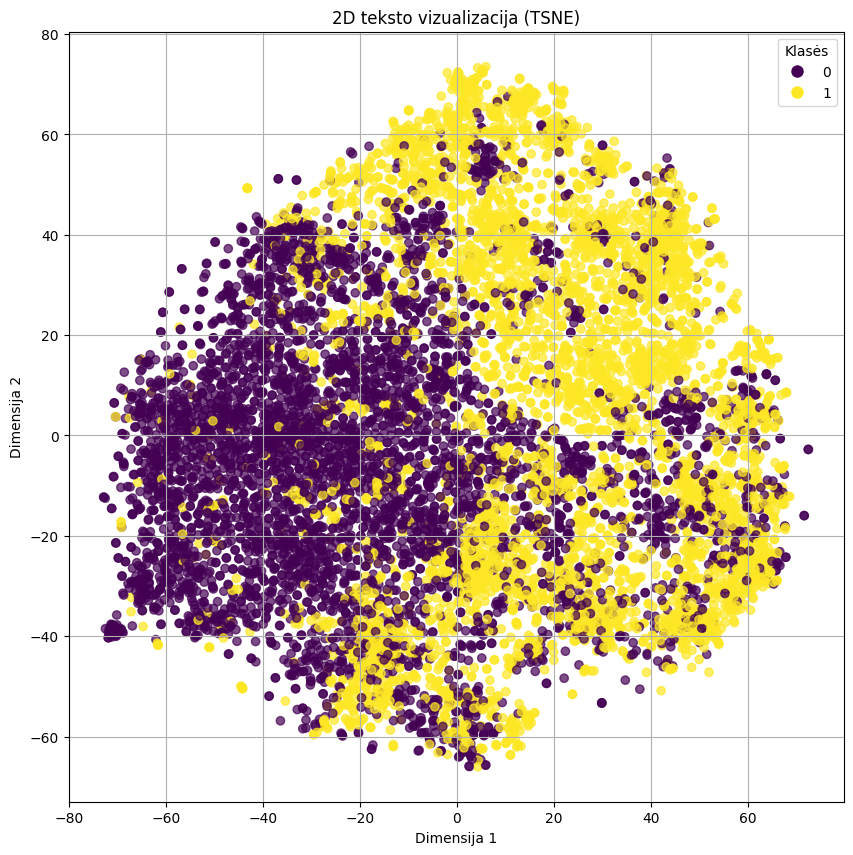

In [20]:
import matplotlib.pyplot as plt

# Plot the words in 2D space
plt.figure(figsize=(10, 10))
scatter = plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=labels[:10000], cmap="viridis", alpha=0.7)

unique_labels = np.unique(labels)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10) for label in unique_labels]
labels_for_legend = [f"{label}" for label in unique_labels]

plt.legend(handles, labels_for_legend, title="Klasės")

plt.title("2D teksto vizualizacija (TSNE)")
plt.xlabel("Dimensija 1")
plt.ylabel("Dimensija 2")
plt.grid()
plt.show()



In [21]:
from sklearn.decomposition import PCA

# Reduce vectors to 2D
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(text_vectors)


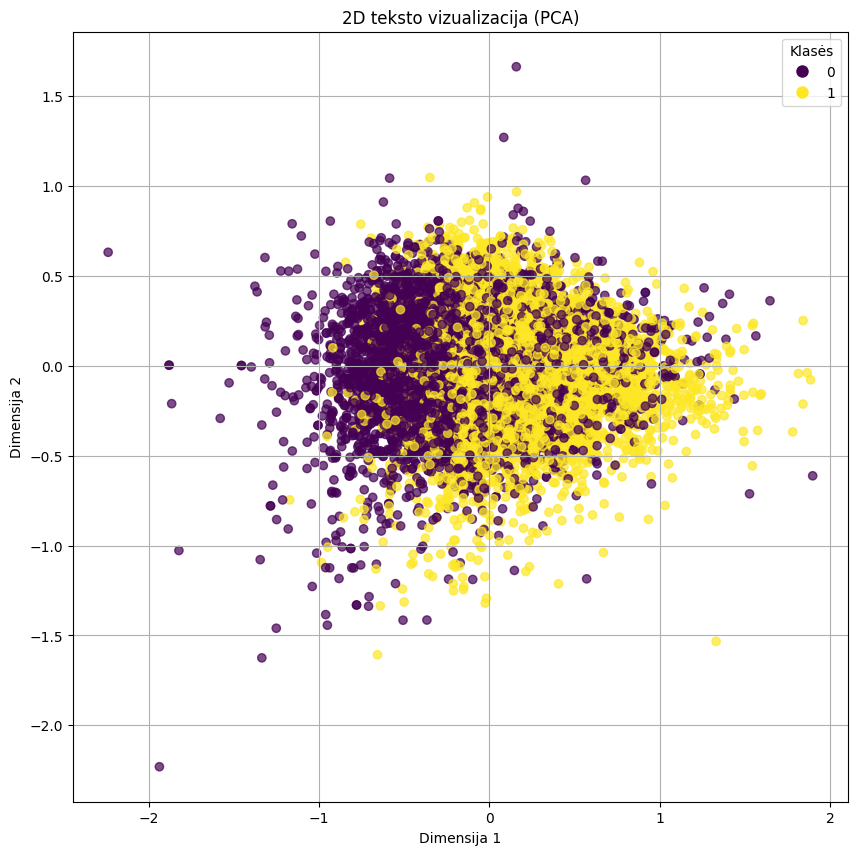

In [23]:
import matplotlib.pyplot as plt

# Plot the words in 2D space
plt.figure(figsize=(10, 10))
scatter = plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=labels[:10000], cmap="viridis", alpha=0.7)

unique_labels = np.unique(labels)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10) for label in unique_labels]
labels_for_legend = [f"{label}" for label in unique_labels]

plt.legend(handles, labels_for_legend, title="Klasės")

plt.title("2D teksto vizualizacija (PCA)")
plt.xlabel("Dimensija 1")
plt.ylabel("Dimensija 2")
plt.grid()
plt.show()